<a href="https://colab.research.google.com/github/Yashwanth-Chandrakumar/Zen-Home-Automation-Tool/blob/main/cats_v_dogs_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [5]:
import tensorflow as tf
from tensorflow import keras
from keras import Sequential
from keras.layers import Dense,Conv2D,MaxPooling2D,Flatten,BatchNormalization,Dropout

In [12]:
# generators
train_ds = keras.utils.image_dataset_from_directory(
    directory = '/content/drive/MyDrive/idenprof/train',
    labels='inferred',
    label_mode = 'int',
    batch_size=16,
    image_size=(256,256)
)

validation_ds = keras.utils.image_dataset_from_directory(
    directory = '/content/drive/MyDrive/idenprof/test',
    labels='inferred',
    label_mode = 'int',
    batch_size=16,
    image_size=(256,256)
)

Found 1800 files belonging to 2 classes.
Found 400 files belonging to 2 classes.


In [13]:
# Normalize
def process(image,label):
    image = tf.cast(image/255. ,tf.float32)
    return image,label

train_ds = train_ds.map(process)
validation_ds = validation_ds.map(process)

In [14]:
# create CNN model

model = Sequential()

model.add(Conv2D(32,kernel_size=(3,3),padding='valid',activation='relu',input_shape=(256,256,3)))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

model.add(Conv2D(64,kernel_size=(3,3),padding='valid',activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

model.add(Conv2D(128,kernel_size=(3,3),padding='valid',activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

model.add(Flatten())

model.add(Dense(128,activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(64,activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(1,activation='sigmoid'))

In [15]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 254, 254, 32)      896       
                                                                 
 batch_normalization_3 (Batc  (None, 254, 254, 32)     128       
 hNormalization)                                                 
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 127, 127, 32)     0         
 2D)                                                             
                                                                 
 conv2d_4 (Conv2D)           (None, 125, 125, 64)      18496     
                                                                 
 batch_normalization_4 (Batc  (None, 125, 125, 64)     256       
 hNormalization)                                                 
                                                      

In [16]:
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

In [17]:
history = model.fit(train_ds,epochs=10,validation_data=validation_ds)

Epoch 1/10
113/113 [==============================] - 162s 1s/step - loss: 3.0342 - accuracy: 0.7933 - val_loss: 2.8174 - val_accuracy: 0.7525
Epoch 2/10
113/113 [==============================] - 7s 59ms/step - loss: 1.2836 - accuracy: 0.8156 - val_loss: 2.0774 - val_accuracy: 0.5725
Epoch 3/10
113/113 [==============================] - 7s 63ms/step - loss: 0.7266 - accuracy: 0.8472 - val_loss: 0.6821 - val_accuracy: 0.8225
Epoch 4/10
113/113 [==============================] - 7s 60ms/step - loss: 0.4276 - accuracy: 0.8967 - val_loss: 1.3578 - val_accuracy: 0.5450
Epoch 5/10
113/113 [==============================] - 8s 71ms/step - loss: 0.3060 - accuracy: 0.9089 - val_loss: 0.4670 - val_accuracy: 0.8825
Epoch 6/10
113/113 [==============================] - 7s 56ms/step - loss: 0.2744 - accuracy: 0.9278 - val_loss: 0.1921 - val_accuracy: 0.9475
Epoch 7/10
113/113 [==============================] - 7s 57ms/step - loss: 0.2573 - accuracy: 0.9328 - val_loss: 0.6472 - val_accuracy: 0.8050

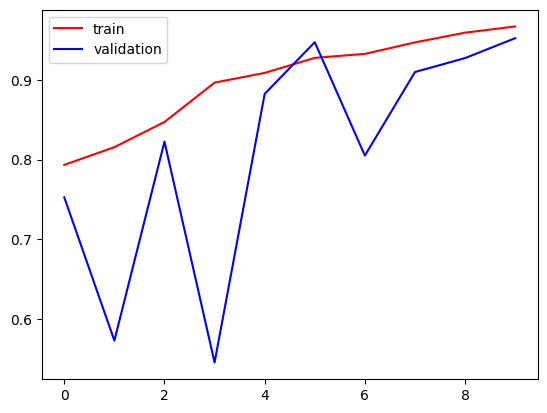

In [18]:
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'],color='red',label='train')
plt.plot(history.history['val_accuracy'],color='blue',label='validation')
plt.legend()
plt.show()

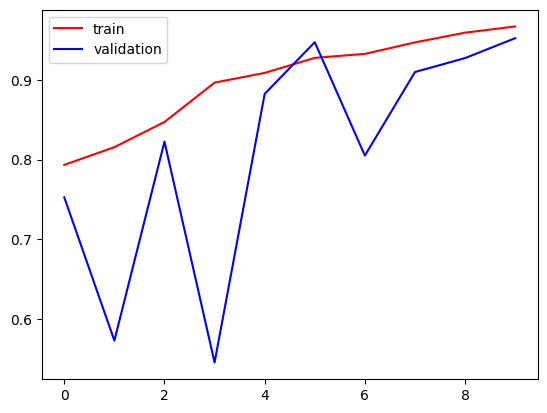

In [19]:
plt.plot(history.history['accuracy'],color='red',label='train')
plt.plot(history.history['val_accuracy'],color='blue',label='validation')
plt.legend()
plt.show()

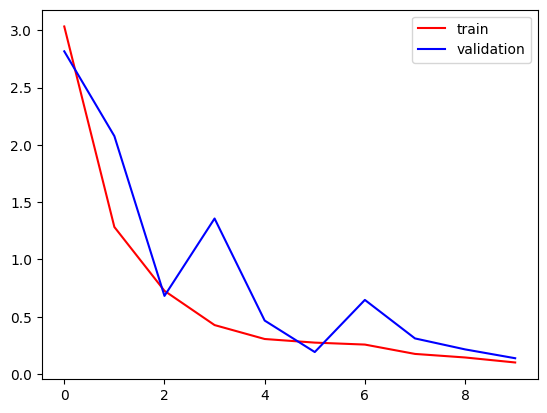

In [20]:
plt.plot(history.history['loss'],color='red',label='train')
plt.plot(history.history['val_loss'],color='blue',label='validation')
plt.legend()
plt.show()

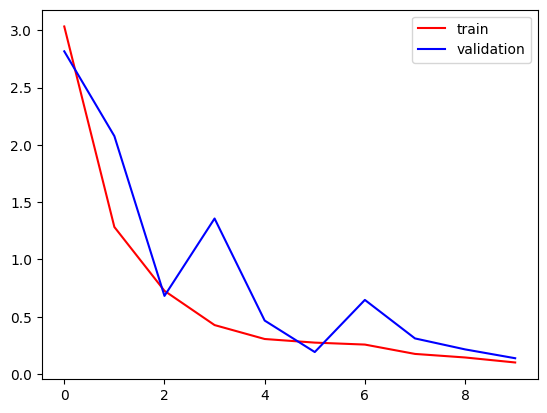

In [21]:
plt.plot(history.history['loss'],color='red',label='train')
plt.plot(history.history['val_loss'],color='blue',label='validation')
plt.legend()
plt.show()

In [ ]:
# ways to reduce overfitting

# Add more data
# Data Augmentation -> next video
# L1/L2 Regularizer
# Dropout
# Batch Norm
# Reduce complexity

In [22]:
import cv2

In [68]:
test_img = cv2.imread('/content/drive/MyDrive/idenprof/train/chef/chef-888.jpg')

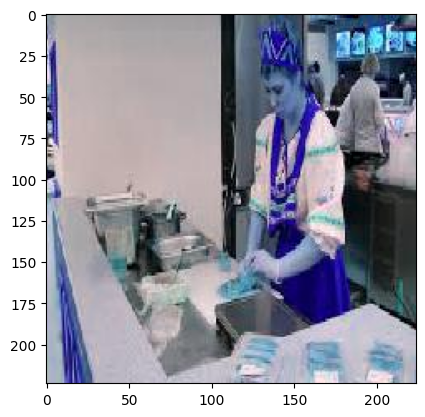

In [69]:
plt.imshow(test_img)

In [70]:
test_img.shape

(224, 224, 3)

In [71]:
test_img = cv2.resize(test_img,(256,256))

In [72]:
test_input = test_img.reshape((1,256,256,3))

In [73]:
x = model.predict(test_input)
if (x==0):
    print("Chef")
else:
    print("Police")

1/1 [==============================] - 0s 21ms/step
Chef
